# Goose test page 3

Text(0.5, 1.0, 'Pinkfoot locations on day 300')

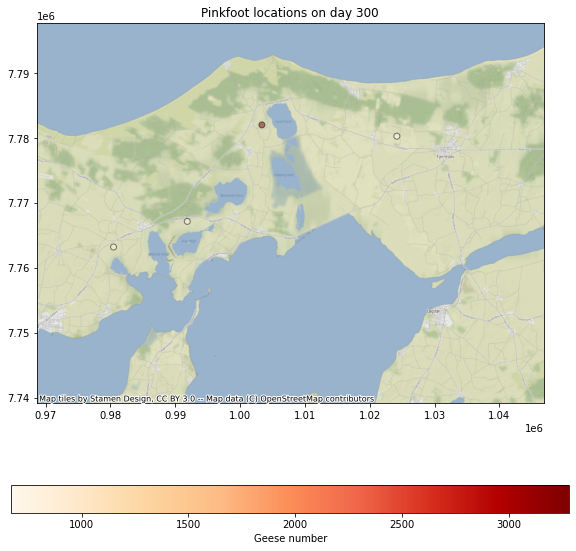

In [2]:
import geopandas as gpd
#import rasterio
import pandas as pd
#import datetime as dt
import numpy as np
#import time
#import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import configparser, os
import contextily as ctx

# def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
#     xmin, xmax, ymin, ymax = ax.axis()
#     basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
#     ax.imshow(basemap, extent=extent, interpolation='bilinear')
#     # restore original x/y limits
#     ax.axis((xmin, xmax, ymin, ymax))

is_timed = True

species_names = ["barnacle", "greylag", "pinkfoot"]
geese_foods = ['grain', 'grass', 'maize']
if is_timed==True:
    is_timed_str = '_timed'
else:
    is_timed_str = ''
    
data_dir = "~/CLionProjects/GooseTests/run-directory1/"
source_dir = "~/CLionProjects/ALMaSS_all"
field_dir ="~/CLionProjects/GooseTests/ALMaSS_inputs"
additional_dir = "~/CLionProjects/data/"
# let us read the config data, it will be useful afterwards
CONFIG_PATH=data_dir+'TIALMaSSConfig.cfg'
with open(os.path.expanduser(CONFIG_PATH), 'r') as f:
    config_string = '[dummy_section]\n' + f.read()
config = configparser.ConfigParser(strict=False)
config.read_string(config_string)
xy_data=pd.read_csv(data_dir+"GooseXYDump.txt", sep='\t', header=0)
v_out=gpd.read_file(os.path.expanduser(additional_dir+"vejlerne-outline.gpkg"))
v_out_crs=v_out.to_crs(crs = "+proj=utm +zone=32 +ellps=GRS80 +units=m +no_defs")
w, s, e, n =v_out_crs.to_crs(epsg=3857).total_bounds
img, ext=ctx.bounds2img(w, s, e, n, zoom=12)
# define grid size
grid_size = 1000
# Since the map to use is (according to ldalby)
x = 484378
y = 6335161
dimx = 36000
dimy = 24000
# I still do not understand completely why Lars does it, 
#I am rather sure there is some more obvious way to do the following calculation:
xy_data['X_manip'] = np.int_(np.floor(xy_data.X+x)) # Longtitude
xy_data['Y_manip'] = np.int_(np.floor(y-xy_data.Y)) # Latitude
xy_summary=xy_data.groupby(['X_manip', 'Y_manip']).agg(geese_num=('X','count'))

geodata=gpd.GeoDataFrame(xy_summary,geometry=gpd.points_from_xy([i[0] for i in list(xy_summary.index.unique())],[i[1] for i in list(xy_summary.index.unique())]),
                         crs ="+proj=utm +zone=32 +ellps=GRS80 +units=m +no_defs").to_crs(epsg=3857)
f, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=ext)
geodata.plot(column='geese_num',alpha=0.5, edgecolor='k', cmap='OrRd', ax=ax,legend_kwds={'label': "Geese number", 'orientation': "horizontal"},legend=True)
ctx.add_basemap(ax, zoom=12)
ax.set_title('Pinkfoot locations on day 300')